<a href="https://colab.research.google.com/github/buthaina279/DS_Capstone_NLP/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import all needed libraries
import tweepy                   # Python wrapper around Twitter API
from google.colab import drive  # to mount Drive to Colab notebook
import json
import csv
from datetime import date
from datetime import datetime
import time

In [ ]:
# Install Libraries
!pip install pycountry

In [ ]:
!pip install langdetect

In [14]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [9]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [23]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/datasets/twitter_analysis'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
consumer_key="5iwJ0kh5IkWudh2kXbbV0s5eM"
consumer_secret="DSZGordR8WpGbNJbxwEwMBvJ4E4RJRbemzLQ0vpVArAzSuoLqY"
access_token="799815406462652416-V4f33Mp2G81GeSLeWVHQgGtp2djIuyK"
access_token_secret="UH4iGaQhmNiKVeo2scTmgZneTQuRDR10SSoyivGS0qU0K"


auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [73]:
# Helper function to get all tweets of a specified user
# NOTE:This method only allows access to the most recent 3200 tweets
# Source: https://gist.github.com/yanofsky/5436496
def get_all_tweets(screen_name):
  # initialize a list to hold all the Tweets
  alltweets = []
  # make initial request for most recent tweets 
  # (200 is the maximum allowed count)
  new_tweets = api.user_timeline(screen_name = screen_name,count=200,lang="en")
  # save most recent tweets
  alltweets.extend(new_tweets)
  # save the id of the oldest tweet less one to avoid duplication
  oldest = alltweets[-1].id - 1
  # keep grabbing tweets until there are no tweets left
  while len(new_tweets) > 0:
    print("getting tweets before %s" % (oldest))
    # all subsequent requests use the max_id param to prevent
    # duplicates
    new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest,lang="en")
    # save most recent tweets
    alltweets.extend(new_tweets)
    # update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    print("...%s tweets downloaded so far" % (len(alltweets)))
    ### END OF WHILE LOOP ###
  # transform the tweepy tweets into a 2D array that will 
  # populate the csv
  outtweets = [[tweet.id_str, tweet.created_at, tweet.text, tweet.favorite_count,
                tweet.retweeted, tweet.user.location, tweet.lang, screen_name] 
               for tweet in alltweets]
  # write the csv
  with open(path + '/%s_tweets.csv' % screen_name, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["tweet_id","created_at","text","likes","retweeted", "location", "language" , "airline"])
    writer.writerows(outtweets)
  pass

In [74]:
get_all_tweets("Saudi_airlines")

getting tweets before 1334489417705283583
...400 tweets downloaded so far
getting tweets before 1333113052523278335
...600 tweets downloaded so far
getting tweets before 1331842146010329087
...800 tweets downloaded so far
getting tweets before 1330515098880892938
...1000 tweets downloaded so far
getting tweets before 1329484694203854847
...1200 tweets downloaded so far
getting tweets before 1328416262863675409
...1400 tweets downloaded so far
getting tweets before 1327585367529238527
...1600 tweets downloaded so far
getting tweets before 1326219825186824194
...1800 tweets downloaded so far
getting tweets before 1325428767305699328
...2000 tweets downloaded so far
getting tweets before 1324199870668906495
...2200 tweets downloaded so far
getting tweets before 1323489534596841472
...2400 tweets downloaded so far
getting tweets before 1322723737125441537
...2600 tweets downloaded so far
getting tweets before 1322025226901901312
...2800 tweets downloaded so far
getting tweets before 132113

In [75]:
saudia_airlines = pd.read_csv("./gdrive/My Drive/datasets/twitter_analysis/Saudi_airlines_tweets.csv")

In [76]:
saudia_airlines.sample(10)

,tweet_id,created_at,text,likes,retweeted,location,language,airline
1690,1325860928630497284,2020-11-09 18:00:53,في الذكرى الخامسة والسبعين لمحة لشبكة وجهات ال...,211,False,Saudi Arabia,und,Saudi_airlines
340,1333677002327519232,2020-12-01 07:39:10,@mohmad181970 مرحباً ضيفنا العزيز، في حال استئ...,0,False,Saudi Arabia,ar,Saudi_airlines
1167,1328517911875645442,2020-11-17 01:58:47,"@SonuKum59437675 Dear guest, international fli...",1,False,Saudi Arabia,en,Saudi_airlines
1191,1328438430284574722,2020-11-16 20:42:57,@Reemm_9999 ضيفنا العزيز، يمكنك السفر الى دول ...,0,False,Saudi Arabia,ar,Saudi_airlines
2699,1321532472400793609,2020-10-28 19:21:08,@yTSyKF9Z44FxuXP مرحبا ضيفنا العزيز، يرجى تزوي...,0,False,Saudi Arabia,ar,Saudi_airlines
3194,1320368402775609349,2020-10-25 14:15:33,"@Ahamedjh Dear guest, We just reply through a ...",0,False,Saudi Arabia,en,Saudi_airlines
743,1330790186704396288,2020-11-23 08:28:00,"@nasruddin410 Hello our dear guest, Saudia wil...",1,False,Saudi Arabia,en,Saudi_airlines
2664,1321767425600348160,2020-10-29 10:54:46,@nouffk__ تم الرد عبر الخاص ضيفتنا العزيزة,0,False,Saudi Arabia,ar,Saudi_airlines
1090,1328899636925521923,2020-11-18 03:15:37,"@Juber96382640 Dear guest, according to the di...",0,False,Saudi Arabia,en,Saudi_airlines
2413,1322648378094850048,2020-10-31 21:15:21,@salmatoh20 ضيفنا العزيز ، وفقا للتوجيهات سيتم...,2,False,Saudi Arabia,ar,Saudi_airlines


In [77]:
get_all_tweets("flynas")

getting tweets before 1333803986864857088
...400 tweets downloaded so far
getting tweets before 1331903679733977088
...600 tweets downloaded so far
getting tweets before 1330055167807549446
...800 tweets downloaded so far
getting tweets before 1328180460221059071
...1000 tweets downloaded so far
getting tweets before 1326192459039338495
...1200 tweets downloaded so far
getting tweets before 1324406303817609218
...1400 tweets downloaded so far
getting tweets before 1322929543569678335
...1600 tweets downloaded so far
getting tweets before 1321350527469367295
...1800 tweets downloaded so far
getting tweets before 1319797682727170049
...2000 tweets downloaded so far
getting tweets before 1318201592693329920
...2200 tweets downloaded so far
getting tweets before 1316789074557100033
...2400 tweets downloaded so far
getting tweets before 1315389871813464063
...2600 tweets downloaded so far
getting tweets before 1314166213241700353
...2800 tweets downloaded so far
getting tweets before 131273

In [60]:
flynas_airlines = pd.read_csv("./gdrive/My Drive/datasets/twitter_analysis/flynas_tweets.csv")

In [61]:
flynas_airlines.sample(10)

,id,created_at,text,likes,in reply to,retweeted,location,language
2829,1312469651083853824,2020-10-03 19:08:43,"@Mehtab0000786 Hello dear, provide us with you...",0,Mehtab0000786,False,Saudi Arabia,en
719,1328838370856984577,2020-11-17 23:12:10,@A_F_Alanzi وعليكم السلام ، يرجى تزويدنا برقم ...,0,A_F_Alanzi,False,Saudi Arabia,ar
1862,1319281845918265347,2020-10-22 14:17:57,ايش الأغراض اللي ماتقدر تسافر بدونها ؟ 👀\n\n#ط...,14,NaN,False,Saudi Arabia,ar
1239,1324001912254091270,2020-11-04 14:53:49,@hatemamreet مرحبا، تم الرد في الخاص .,0,hatemamreet,False,Saudi Arabia,ar
2943,1311701994210549760,2020-10-01 16:18:20,@A_thobaiti وعليكم السلام، يسمح بحمله فقط داخل...,0,A_thobaiti,False,Saudi Arabia,ar
1768,1320018351800930306,2020-10-24 15:04:34,@ii_il15 حياك الله ، تم الرد من خلال الخاص . ش...,0,ii_il15,False,Saudi Arabia,ar
306,1332817897144594432,2020-11-28 22:45:23,@sale_b0b تم الرد عبر الخاص,0,sale_b0b,False,Saudi Arabia,ar
2387,1315536164716261377,2020-10-12 06:13:57,@Asamjh11123 حياك الله،تابعنا وسيتم الإعلان عن...,0,Asamjh11123,False,Saudi Arabia,ar
2785,1312782872001085443,2020-10-04 15:53:21,@kmell4411 مرحبا، تابعنا بإستمرار وسيتم الإعلا...,0,kmell4411,False,Saudi Arabia,ar
2650,1313770948017958914,2020-10-07 09:19:37,@MecFawzi حياك الله ،رحلاتنا من مطار الملك عبد...,0,MecFawzi,False,Saudi Arabia,ar


In [65]:
is_eng = [saudia_airlines["language"] == "en"]


[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 3218    False
 3219     True
 3220     True
 3221     True
 3222     True
 Name: language, Length: 3223, dtype: bool]

In [72]:
is_eng.count("True")

ValueError: ignored

In [53]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = "flynas"
noOfTweet = 100



tweets = tweepy.Cursor(api.search, q=keyword, lang = "en", since = "2019-09-01" ).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [54]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))


total number:  87
positive number:  53
negative number:  20
neutral number:  14


In [17]:
# Function created to extract coordinates from tweet if it has coordinate info
# Tweets tend to have null so important to run check
# Make sure to run this cell as it is used in a lot of different functions below
def extract_coordinates(row):
    if row['Tweet Coordinates']:
        return row['Tweet Coordinates']['coordinates']
    else:
        return None
# Function created to extract place such as city, state or country from tweet if it has place info
# Tweets tend to have null so important to run check
# Make sure to run this cell as it is used in a lot of different functions below
def extract_place(row):
    if row['Place Info']:
        return row['Place Info'].full_name
    else:
        return None

In [12]:
noOfTweet = 100
tweets = tweepy.Cursor(api.search, q="Saudi_airlines", lang = "en").items(noOfTweet)

In [18]:
# Pulling information from tweets iterable object
# Add or remove tweet information you want in the below list comprehension
tweets_list = [[tweet.text, tweet.created_at, tweet.id_str, tweet.user.screen_name, 
                tweet.coordinates, tweet.place, tweet.retweet_count, tweet.favorite_count, 
                tweet.lang, tweet.source, tweet.in_reply_to_status_id_str, tweet.in_reply_to_user_id_str,
                tweet.is_quote_status] for tweet in tweets]
 
# Creation of dataframe from tweets_list
# Add or remove columns as you remove tweet information
tweets_df = pd.DataFrame(tweets_list,columns=['Tweet Text', 'Tweet Datetime', 'Tweet Id', 'Twitter @ Name', 'Tweet Coordinates', 'Place Info', 'Retweets', 'Favorites', 'Language', 'Source', 'Replied Tweet Id', 'Replied Tweet User Id Str', 'Quote Status Bool'])
 
# Checks if there are coordinates attached to tweets, if so extracts them
tweets_df['Tweet Coordinates'] = tweets_df.apply(extract_coordinates,axis=1)
 
# Checks if there is place information available, if so extracts them
tweets_df['Place Info'] = tweets_df.apply(extract_place,axis=1)

In [19]:
tweets_df

,Tweet Text,Tweet Datetime,Tweet Id,Twitter @ Name,Tweet Coordinates,Place Info,Retweets,Favorites,Language,Source,Replied Tweet Id,Replied Tweet User Id Str,Quote Status Bool


In [35]:
tweet_list

,0
0,@ahmadchuhan12 @SupportPoonam @DGCAIndia @drau...
1,@Saudi_Airlines Sir plzz open flight india to ...
2,Please sir very humble request start flight #I...
3,@Saudi_Airlines @mahmoudmakhlou2 Sir please op...
4,@Saudi_Airlines may I book it https://t.co/k2m...
...,...
995,@Saudi_Airlines I request for refund with in h...
996,"@Ahmad91169140 Welcome valued guest, The fligh..."
997,RT @JetPhotos: A Saudi Arabian Airlines 787 in...
998,@Saudi_Airlines Sir please open flights india ...


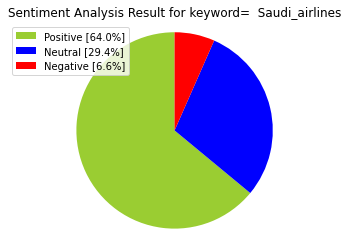

In [14]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [1]:
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in tweet_list:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

NameError: ignored

In [37]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,@ahmadchuhan12 @SupportPoonam @DGCAIndia @drau...,@ahmadchuhan12 @SupportPoonam @DGCAIndia @drau...
1,@Saudi_Airlines Sir plzz open flight india to ...,@Saudi_Airlines Sir plzz open flight india to ...
2,Please sir very humble request start flight #I...,Please sir very humble request start flight #I...
3,@Saudi_Airlines @mahmoudmakhlou2 Sir please op...,@Saudi_Airlines @mahmoudmakhlou2 Sir please op...
4,@Saudi_Airlines may I book it https://t.co/k2m...,@Saudi_Airlines may I book it https://t.co/k2m...
...,...,...
995,@Saudi_Airlines I request for refund with in h...,@Saudi_Airlines I request for refund with in h...
996,"@Ahmad91169140 Welcome valued guest, The fligh...","@Ahmad91169140 Welcome valued guest, The fligh..."
997,RT @JetPhotos: A Saudi Arabian Airlines 787 in...,RT @JetPhotos: A Saudi Arabian Airlines 787 in...
998,@Saudi_Airlines Sir please open flights india ...,@Saudi_Airlines Sir please open flights india ...


In [38]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
tw_list["text"] = tw_list["text"].apply(cleanTxt)

# Show the cleaned tweets
tw_list

,0,text
0,@ahmadchuhan12 @SupportPoonam @DGCAIndia @drau...,12 Dear sir…
1,@Saudi_Airlines Sir plzz open flight india to ...,_Airlines Sir plzz open flight india to Saudi ...
2,Please sir very humble request start flight #I...,Please sir very humble request start flight In...
3,@Saudi_Airlines @mahmoudmakhlou2 Sir please op...,_Airlines 2 Sir please open flyight india to s...
4,@Saudi_Airlines may I book it https://t.co/k2m...,_Airlines may I book it
...,...,...
995,@Saudi_Airlines I request for refund with in h...,_Airlines I request for refund with in how man...
996,"@Ahmad91169140 Welcome valued guest, The fligh...","1169140 Welcome valued guest, The flights From..."
997,RT @JetPhotos: A Saudi Arabian Airlines 787 in...,: A Saudi Arabian Airlines 787 in special G20 ...
998,@Saudi_Airlines Sir please open flights india ...,_Airlines Sir please open flights india to sau...


In [40]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
tw_list['Subjectivity'] = tw_list['text'].apply(getSubjectivity)
tw_list['Polarity'] = tw_list['text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
tw_list

,0,text,Subjectivity,Polarity
0,@ahmadchuhan12 @SupportPoonam @DGCAIndia @drau...,12 Dear sir…,0.000000,0.000000
1,@Saudi_Airlines Sir plzz open flight india to ...,_Airlines Sir plzz open flight india to Saudi ...,0.500000,0.000000
2,Please sir very humble request start flight #I...,Please sir very humble request start flight In...,0.520000,-0.260000
3,@Saudi_Airlines @mahmoudmakhlou2 Sir please op...,_Airlines 2 Sir please open flyight india to s...,0.500000,0.000000
4,@Saudi_Airlines may I book it https://t.co/k2m...,_Airlines may I book it,0.000000,0.000000
...,...,...,...,...
995,@Saudi_Airlines I request for refund with in h...,_Airlines I request for refund with in how man...,0.750000,0.250000
996,"@Ahmad91169140 Welcome valued guest, The fligh...","1169140 Welcome valued guest, The flights From...",0.650000,0.400000
997,RT @JetPhotos: A Saudi Arabian Airlines 787 in...,: A Saudi Arabian Airlines 787 in special G20 ...,0.571429,0.357143
998,@Saudi_Airlines Sir please open flights india ...,_Airlines Sir please open flights india to sau...,0.500000,0.000000


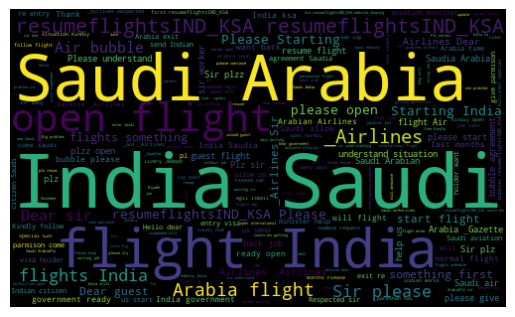

In [42]:
# word cloud visualization
allWords = ' '.join([twts for twts in tw_list['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [43]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
tweet_list['Analysis'] = tweet_list['Polarity'].apply(getAnalysis)
# Show the dataframe
tweet_list

,0,text,Subjectivity,Polarity,Analysis
0,@ahmadchuhan12 @SupportPoonam @DGCAIndia @drau...,12 Dear sir…,0.000000,0.000000,Neutral
1,@Saudi_Airlines Sir plzz open flight india to ...,_Airlines Sir plzz open flight india to Saudi ...,0.500000,0.000000,Neutral
2,Please sir very humble request start flight #I...,Please sir very humble request start flight In...,0.520000,-0.260000,Negative
3,@Saudi_Airlines @mahmoudmakhlou2 Sir please op...,_Airlines 2 Sir please open flyight india to s...,0.500000,0.000000,Neutral
4,@Saudi_Airlines may I book it https://t.co/k2m...,_Airlines may I book it,0.000000,0.000000,Neutral
...,...,...,...,...,...
995,@Saudi_Airlines I request for refund with in h...,_Airlines I request for refund with in how man...,0.750000,0.250000,Positive
996,"@Ahmad91169140 Welcome valued guest, The fligh...","1169140 Welcome valued guest, The flights From...",0.650000,0.400000,Positive
997,RT @JetPhotos: A Saudi Arabian Airlines 787 in...,: A Saudi Arabian Airlines 787 in special G20 ...,0.571429,0.357143,Positive
998,@Saudi_Airlines Sir please open flights india ...,_Airlines Sir please open flights india to sau...,0.500000,0.000000,Neutral
